In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
from HOTS.Event import Event, SimpleAlphabet
from HOTS.STS import STS2
from HOTS.Layer import FilterNHBD
from HOTS.Monitor import DisplaySurface3D, DisplaySurface2D, DisplayImage

(8224, 2)


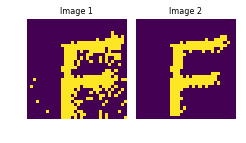

In [4]:
image_list = [1]#, 32, 19, 22, 29]
event0 = Event(ImageSize=(32,32),OutOnePolarity=False)

event0.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=image_list)
InputFilter = FilterNHBD(threshold=15,neighbourhood=2)
event1 = InputFilter.RunLayer(event0)


DisplayImage([event0,event1])
print(event1.address.shape)

In [5]:
target_event = 8222

In [6]:
SpTe= STS2(tau=0.02, R=2,verbose=1,initial_time=0)
Surface = SpTe.create(event = event1, stop = target_event)

Generation of SpatioTemporal Surface in ------ 0.65 s


In [7]:
w = SpTe.R + 1
x,y = event0.address[target_event, 0],event1.address[target_event, 1]
(x0, y0) = (x + SpTe.R - w, y + SpTe.R - w)
(x1, y1) = (x + SpTe.R + w, y + SpTe.R + w)

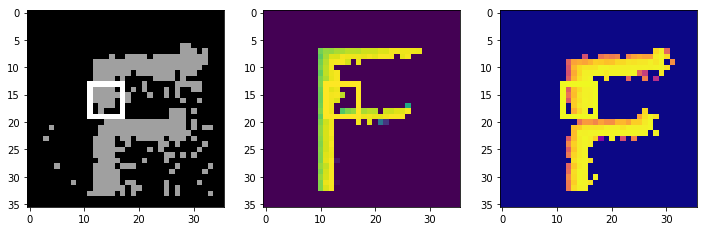

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(3 * 4, 1 * 4))
image = np.zeros((SpTe.width, SpTe.height))
image[event0.address[0:target_event+1, 0].T + SpTe.R, 
      event0.address[0:target_event+1, 1].T + SpTe.R] = event0.polarity[0:target_event+1].T
image1 = image.copy()
cv2.rectangle(image1, (y0, x0), (y1, x1),
              color=np.amax(image)+0.6)
#axs[0].axis('off')
axs[0].imshow(image1,cmap = plt.gray(),interpolation='nearest')

ImageTimeMat1 = SpTe.ListOfTimeMatrix[0, :, :].copy()
cv2.rectangle(ImageTimeMat1, (y0, x0), (y1, x1),
              color=np.amax(ImageTimeMat1) + 0.001)
#axs[1].axis('off')
axs[1].imshow(ImageTimeMat1, cmap=plt.viridis(),interpolation='nearest')

ImageTimeMat2 = SpTe.ListOfTimeMatrix[1, :, :].copy()
cv2.rectangle(ImageTimeMat2, (y0, x0), (y1, x1),
              color=np.amax(ImageTimeMat2) + 0.001)
#axs[2].axis('off')
axs[2].imshow(ImageTimeMat2, cmap=plt.plasma(),interpolation='nearest');

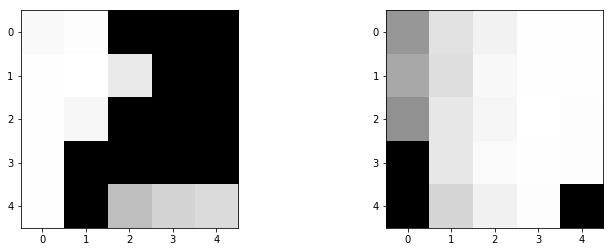

In [9]:
ig, axs = plt.subplots(1, 2, figsize=(3 * 4, 1 * 4))
x_t, y_t = x + SpTe.R, y + SpTe.R
to_plot = SpTe.ListOfTimeMatrix[ : , (x_t-SpTe.R):(x_t+SpTe.R+1),(y_t-SpTe.R):(y_t+SpTe.R+1)]
axs[0].imshow(to_plot[0,:,:], cmap=plt.gray(),interpolation = "nearest")
axs[1].imshow(to_plot[1,:,:], cmap=plt.gray(),interpolation = "nearest")

In [10]:
print(to_plot[1,:,:])
#print(SpTe.timedistance)
print(SpTe.valid)
print(SpTe.list_valid)

[[0.06765  0.100687 0.108501 0.113564 0.11355 ]
 [0.075522 0.099336 0.11104  0.113847 0.113514]
 [0.064904 0.103342 0.109508 0.114404 0.113233]
 [0.       0.103269 0.111903 0.113833 0.113247]
 [0.       0.095289 0.108057 0.11336  0.      ]]
82
[1361, 1596, 1650, 1658, 1755, 1993, 2079, 2163, 2207, 2229, 2331, 2396, 2508, 2573, 2580, 2647, 2664, 2766, 2806, 2811, 2824, 2847, 2909, 2928, 2939, 3015, 3016, 3018, 3100, 3102, 3106, 3195, 3201, 3278, 3279, 3391, 3399, 3475, 3565, 3568, 3587, 3594, 3657, 3788, 3883, 3892, 4118, 4128, 4157, 4225, 4229, 4365, 4749, 4870, 5004, 5123, 5277, 5479, 5486, 5509, 5531, 5748, 5754, 6015, 6031, 6050, 6142, 6297, 6398, 6408, 7010, 7083, 7273, 7354, 7494, 7515, 7665, 7771, 7790, 7949, 8033, 8217]


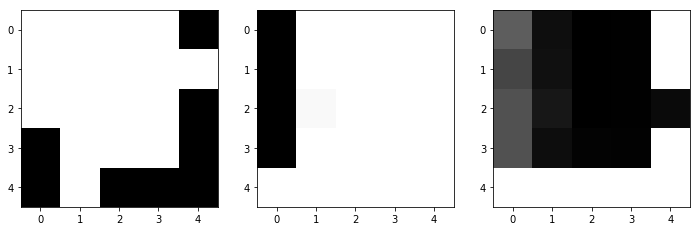

In [11]:
ig, axs = plt.subplots(1, 3, figsize=(3 * 4, 1 * 4))
x_t, y_t = x + SpTe.R, y + SpTe.R

image_local = image[(x_t-SpTe.R):(x_t+SpTe.R+1), (y_t-SpTe.R):(y_t+SpTe.R+1)]
axs[0].imshow(image_local, cmap=plt.gray(), interpolation = "nearest")
axs[1].imshow(SpTe.LocalTimeDiff[0, :, :], cmap=plt.gray(),interpolation = "nearest")
axs[2].imshow(SpTe.LocalTimeDiff[1, :, :], cmap=plt.gray(), interpolation = "nearest");

(8223, 50)


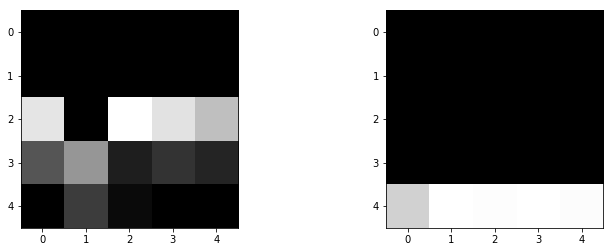

In [12]:
print(SpTe.Surface.shape)
ig, axs = plt.subplots(1, 2, figsize=(3 * 4, 1 * 4))
x_t, y_t = x + SpTe.R, y + SpTe.R
to_plot = SpTe.Surface[SpTe.list_valid[50],:].reshape((2,5,5))
                                                     
axs[0].imshow(to_plot[0], cmap=plt.gray(), interpolation = "nearest")
axs[1].imshow(to_plot[1], cmap=plt.gray(), interpolation = "nearest")
#axs[1].imshow(SpTe.LocalTimeDiff[0, :, :], cmap=plt.gray(),interpolation = "nearest")
#axs[2].imshow(SpTe.LocalTimeDiff[1, :, :], cmap=plt.gray(), interpolation = "nearest");

5.0
17.0


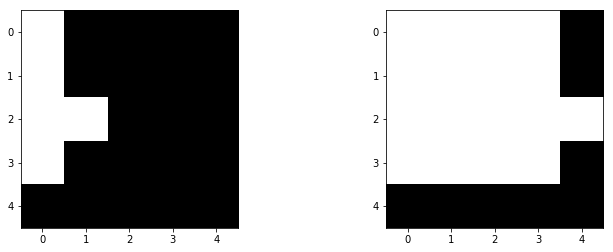

In [13]:
ig, axs = plt.subplots(1, 2, figsize=(3 * 4, 1 * 4))
print(np.sum(SpTe.LocalBinaryMask[0, :, :]))
print(np.sum(SpTe.LocalBinaryMask[1, :, :]))
axs[0].imshow(SpTe.LocalBinaryMask[0, :, :], cmap=plt.gray(), interpolation = "nearest")
axs[1].imshow(SpTe.LocalBinaryMask[1, :, :], cmap=plt.gray(), interpolation = "nearest")

In [16]:
print(SpTe.area)

25


In [17]:
test = SpTe.LocalTimeDiff[1, :, :]
print(np.mean(test))

0.04422904


In [18]:
test = np.arange(25).reshape(5,5)
test += 15
print(test)


[[15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]]


In [19]:
(test < 16).any()

True